In [173]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [174]:
df = pd.read_csv("../data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [175]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [176]:
df.loc[df["Market Category"].isna(), "Market Category"] = "Unknown"
df = df.dropna()
df.shape

(11812, 16)

In [177]:
from sklearn.preprocessing import MultiLabelBinarizer
# Wir erstellen aus der Spalte Marketcategory mehrere Spalten mit den Komma-Separierten Werten

mlb = MultiLabelBinarizer()
market_category_cols = mlb.fit_transform(df["Market Category"].str.split(","))
mlb.classes_

array(['Crossover', 'Diesel', 'Exotic', 'Factory Tuner', 'Flex Fuel',
       'Hatchback', 'High-Performance', 'Hybrid', 'Luxury', 'Performance',
       'Unknown'], dtype=object)

In [178]:
# Den Transformer können wirt auf die Spalte anwenden
market_category_df = pd.DataFrame(market_category_cols, columns=mlb.classes_)
market_category_df

,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance,Unknown
0,0,0,0,1,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11807,1,0,0,0,0,1,0,0,1,0,0
11808,1,0,0,0,0,1,0,0,1,0,0
11809,1,0,0,0,0,1,0,0,1,0,0
11810,1,0,0,0,0,1,0,0,1,0,0


In [179]:
# Dieses DataFrame joinen wir an das bisherige

df_inkl_market_cats = pd.concat([df, market_category_df], axis=1)
df_inkl_market_cats = df_inkl_market_cats.drop("Market Category", axis=1)
df_inkl_market_cats = df_inkl_market_cats.dropna(axis=0)
df_inkl_market_cats.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance,Unknown
0,BMW,1 Series M,2011.0,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,BMW,1 Series,2011.0,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,BMW,1 Series,2011.0,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,BMW,1 Series,2011.0,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,BMW,1 Series,2011.0,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [180]:
df_inkl_market_cats.shape

(11710, 26)

In [181]:
# Wir entfernen die Fahzeugnamen, da diese zu vielen führen und außerdem irreführend sein könnten, wenn ein Fahrzeug nicht bekannt ist.

df_inkl_market_cats = df_inkl_market_cats.drop("Model", axis=1)

In [182]:
# Die Spalte Market Category == Unknown hat jetzt keinen Mehrwert mehr. Wir entfernen sie
df_inkl_market_cats = df_inkl_market_cats.drop("Unknown", axis=1, errors="ignore")

In [183]:
df_inkl_market_cats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11710 entries, 0 to 11811
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11710 non-null  object 
 1   Year               11710 non-null  float64
 2   Engine Fuel Type   11710 non-null  object 
 3   Engine HP          11710 non-null  float64
 4   Engine Cylinders   11710 non-null  float64
 5   Transmission Type  11710 non-null  object 
 6   Driven_Wheels      11710 non-null  object 
 7   Number of Doors    11710 non-null  float64
 8   Vehicle Size       11710 non-null  object 
 9   Vehicle Style      11710 non-null  object 
 10  highway MPG        11710 non-null  float64
 11  city mpg           11710 non-null  float64
 12  Popularity         11710 non-null  float64
 13  MSRP               11710 non-null  float64
 14  Crossover          11710 non-null  float64
 15  Diesel             11710 non-null  float64
 16  Exotic             11710 no

In [184]:
df_inkl_market_cats = pd.get_dummies(df_inkl_market_cats)

In [185]:
df_inkl_market_cats.shape

(11710, 102)

In [186]:
df_inkl_market_cats_corr = df_inkl_market_cats.corr()

In [187]:
df_inkl_market_cats_corr["MSRP"].abs().sort_values(ascending=False).head(n=30)

MSRP                                                          1.000000
Engine HP                                                     0.662182
Engine Cylinders                                              0.544314
Engine Fuel Type_premium unleaded (required)                  0.461950
Make_Bugatti                                                  0.454252
Engine Fuel Type_regular unleaded                             0.360574
Make_Lamborghini                                              0.321328
Make_Maybach                                                  0.309209
Make_Bentley                                                  0.272432
Make_Rolls-Royce                                              0.264538
Make_Ferrari                                                  0.248725
Driven_Wheels_front wheel drive                               0.237919
Make_Aston Martin                                             0.232809
Transmission Type_AUTOMATED_MANUAL                            0.230578
Year  

In [188]:
df_inkl_market_cats_corr["MSRP"].abs().sort_values(ascending=False).head(n=30)

MSRP                                                          1.000000
Engine HP                                                     0.662182
Engine Cylinders                                              0.544314
Engine Fuel Type_premium unleaded (required)                  0.461950
Make_Bugatti                                                  0.454252
Engine Fuel Type_regular unleaded                             0.360574
Make_Lamborghini                                              0.321328
Make_Maybach                                                  0.309209
Make_Bentley                                                  0.272432
Make_Rolls-Royce                                              0.264538
Make_Ferrari                                                  0.248725
Driven_Wheels_front wheel drive                               0.237919
Make_Aston Martin                                             0.232809
Transmission Type_AUTOMATED_MANUAL                            0.230578
Year  

In [189]:
high_correlated_cols = df_inkl_market_cats_corr[df_inkl_market_cats_corr["MSRP"] > 0.05].index
high_correlated_cols

Index(['Year', 'Engine HP', 'Engine Cylinders', 'MSRP', 'Exotic',
       'High-Performance', 'Luxury', 'Make_Aston Martin', 'Make_BMW',
       'Make_Bentley', 'Make_Bugatti', 'Make_Ferrari', 'Make_Lamborghini',
       'Make_Land Rover', 'Make_Maserati', 'Make_Maybach', 'Make_McLaren',
       'Make_Mercedes-Benz', 'Make_Porsche', 'Make_Rolls-Royce',
       'Engine Fuel Type_flex-fuel (premium unleaded required/E85)',
       'Engine Fuel Type_premium unleaded (required)',
       'Transmission Type_AUTOMATED_MANUAL', 'Driven_Wheels_all wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle Size_Large',
       'Vehicle Style_Convertible', 'Vehicle Style_Coupe'],
      dtype='object')

In [190]:
df_high_corr = df_inkl_market_cats[high_correlated_cols]
df_high_corr.shape

(11710, 28)

In [191]:
df_high_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11710 entries, 0 to 11811
Data columns (total 28 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year                                                        11710 non-null  float64
 1   Engine HP                                                   11710 non-null  float64
 2   Engine Cylinders                                            11710 non-null  float64
 3   MSRP                                                        11710 non-null  float64
 4   Exotic                                                      11710 non-null  float64
 5   High-Performance                                            11710 non-null  float64
 6   Luxury                                                      11710 non-null  float64
 7   Make_Aston Martin                                           11710 non-null  bool   
 8   M

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_high_corr)
df_normalized = pd.DataFrame(df_normalized, columns=df_high_corr.columns)
df_normalized.describe()

,Year,Engine HP,Engine Cylinders,MSRP,Exotic,High-Performance,Luxury,Make_Aston Martin,Make_BMW,Make_Bentley,...,Make_Porsche,Make_Rolls-Royce,Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_premium unleaded (required),Transmission Type_AUTOMATED_MANUAL,Driven_Wheels_all wheel drive,Driven_Wheels_rear wheel drive,Vehicle Size_Large,Vehicle Style_Convertible,Vehicle Style_Coupe
count,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,...,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04,1.171000e+04
mean,-7.519253e-15,9.223100e-17,3.737782e-16,3.519341e-17,-3.640697e-17,3.397984e-17,8.737673e-17,4.854263e-18,-2.669845e-17,-4.854263e-18,...,1.941705e-17,2.305775e-17,2.184418e-17,2.912558e-17,-9.708526e-18,1.941705e-17,-4.126123e-17,-4.854263e-17,3.397984e-17,-1.941705e-17
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,...,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00
min,-2.673130e+00,-1.778564e+00,-3.222614e+00,-6.362950e-01,-2.058431e-01,-3.641493e-01,-6.220513e-01,-8.947351e-02,-1.646295e-01,-7.974694e-02,...,-1.083996e-01,-5.152026e-02,-6.806473e-02,-4.487709e-01,-2.364450e-01,-4.982648e-01,-6.253533e-01,-5.472868e-01,-2.658524e-01,-3.360153e-01
25%,-4.389563e-01,-7.252647e-01,-9.376466e-01,-3.224013e-01,-2.058431e-01,-3.641493e-01,-6.220513e-01,-8.947351e-02,-1.646295e-01,-7.974694e-02,...,-1.083996e-01,-5.152026e-02,-6.806473e-02,-4.487709e-01,-2.364450e-01,-4.982648e-01,-6.253533e-01,-5.472868e-01,-2.658524e-01,-3.360153e-01
50%,6.124198e-01,-2.215131e-01,2.048373e-01,-1.752068e-01,-2.058431e-01,-3.641493e-01,-6.220513e-01,-8.947351e-02,-1.646295e-01,-7.974694e-02,...,-1.083996e-01,-5.152026e-02,-6.806473e-02,-4.487709e-01,-2.364450e-01,-4.982648e-01,-6.253533e-01,-5.472868e-01,-2.658524e-01,-3.360153e-01
75%,7.438419e-01,4.654210e-01,2.048373e-01,2.434461e-02,-2.058431e-01,-3.641493e-01,1.607585e+00,-8.947351e-02,-1.646295e-01,-7.974694e-02,...,-1.083996e-01,-5.152026e-02,-6.806473e-02,-4.487709e-01,-2.364450e-01,-4.982648e-01,1.599096e+00,-5.472868e-01,-2.658524e-01,-3.360153e-01
max,8.752639e-01,6.885965e+00,5.917257e+00,3.347881e+01,4.858070e+00,2.746127e+00,1.607585e+00,1.117649e+01,6.074244e+00,1.253967e+01,...,9.225126e+00,1.940984e+01,1.469190e+01,2.228309e+00,4.229314e+00,2.006965e+00,1.599096e+00,1.827196e+00,3.761485e+00,2.976055e+00


In [193]:
X = df_normalized.drop("MSRP", axis=1)
y = df_normalized["MSRP"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

In [194]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)

LinearRegression()

In [195]:
print("Score on training data:", lreg.score(X_train, y_train))
print("Score on test data:", lreg.score(X_test, y_test))

Score on training data: 0.8364860943419665
Score on test data: 0.819273786817014


<Axes: ylabel='Count'>

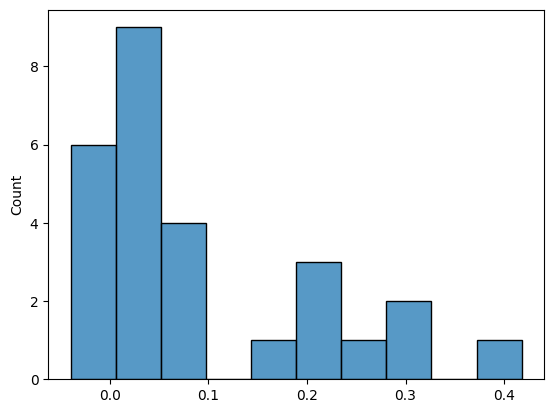

In [196]:
sns.histplot(lreg.coef_, bins=10)

In [197]:
lreg.intercept_

np.float64(0.00013863759441365246)

In [198]:
lreg.coef_

array([ 0.09284945,  0.28900071,  0.01873096, -0.01882104, -0.01324595,
        0.0032956 ,  0.16694015,  0.0149771 ,  0.2131422 ,  0.41781655,
        0.19249232,  0.24426228,  0.03624106,  0.04807869,  0.28434377,
        0.04814272,  0.04662496,  0.05327578,  0.2301119 , -0.00702317,
        0.05392265,  0.03177574,  0.00599262, -0.03982196,  0.00107082,
        0.05389494,  0.01337354])

In [199]:
# Wie viele Parameter haben wir?

df.shape

(11812, 16)